In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/health-insurance-marketplace/Crosswalk2015.csv
/kaggle/input/health-insurance-marketplace/PlanAttributes.csv
/kaggle/input/health-insurance-marketplace/Network.csv
/kaggle/input/health-insurance-marketplace/Rate.csv
/kaggle/input/health-insurance-marketplace/database.sqlite
/kaggle/input/health-insurance-marketplace/Crosswalk2016.csv
/kaggle/input/health-insurance-marketplace/BenefitsCostSharing.csv
/kaggle/input/health-insurance-marketplace/BusinessRules.csv
/kaggle/input/health-insurance-marketplace/ServiceArea.csv
/kaggle/input/health-insurance-marketplace/hashes.txt
/kaggle/input/health-insurance-marketplace/raw/Plan_Attributes_PUF_2015-12-08.csv
/kaggle/input/health-insurance-marketplace/raw/._2014
/kaggle/input/health-insurance-marketplace/raw/Rate_PUF_2015-12-08.csv
/kaggle/input/health-insurance-marketplace/raw/._Plan_Attributes_PUF.csv
/kaggle/input/health-insurance-marketplace/raw/._Service_Area_PUF.csv
/kaggle/input/health-insurance-marketplace/raw/._.sentinel


In [2]:
df=pd.read_csv('/kaggle/input/health-insurance-marketplace/Rate.csv')
print(df.head())

   BusinessYear StateCode  IssuerId SourceName  VersionNum  \
0          2014        AK     21989       HIOS           6   
1          2014        AK     21989       HIOS           6   
2          2014        AK     21989       HIOS           6   
3          2014        AK     21989       HIOS           6   
4          2014        AK     21989       HIOS           6   

            ImportDate  IssuerId2  FederalTIN RateEffectiveDate  \
0  2014-03-19 07:06:49      21989  93-0438772        2014-01-01   
1  2014-03-19 07:06:49      21989  93-0438772        2014-01-01   
2  2014-03-19 07:06:49      21989  93-0438772        2014-01-01   
3  2014-03-19 07:06:49      21989  93-0438772        2014-01-01   
4  2014-03-19 07:06:49      21989  93-0438772        2014-01-01   

  RateExpirationDate  ... IndividualRate IndividualTobaccoRate Couple  \
0         2014-12-31  ...          29.00                   NaN    NaN   
1         2014-12-31  ...          36.95                   NaN   73.9   
2    

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

In [4]:
df.dtypes

BusinessYear                                   int64
StateCode                                     object
IssuerId                                       int64
SourceName                                    object
VersionNum                                     int64
ImportDate                                    object
IssuerId2                                      int64
FederalTIN                                    object
RateEffectiveDate                             object
RateExpirationDate                            object
PlanId                                        object
RatingAreaId                                  object
Tobacco                                       object
Age                                           object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            f

In [5]:
df['ImportDate'] = pd.to_datetime(df['ImportDate'])
df['ImportDate'] = df['ImportDate'].dt.date
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 2,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,21,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,22,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [6]:
df.nunique()

BusinessYear                                      3
StateCode                                        39
IssuerId                                        910
SourceName                                        3
VersionNum                                       23
ImportDate                                      202
IssuerId2                                       910
FederalTIN                                      335
RateEffectiveDate                                14
RateExpirationDate                               26
PlanId                                        16808
RatingAreaId                                     67
Tobacco                                           2
Age                                              47
IndividualRate                               149181
IndividualTobaccoRate                        153930
Couple                                         5533
PrimarySubscriberAndOneDependent               5974
PrimarySubscriberAndTwoDependents              7047
PrimarySubsc

In [7]:
df=df.drop(['VersionNum' ,'RowNumber'],axis=1 )

In [8]:
df=df.drop('IssuerId2',axis=1 )

In [9]:
df['IndividualRate']=df['IndividualRate'].fillna(0)
df['IndividualTobaccoRate']=df['IndividualTobaccoRate'].fillna(0)
df['Couple']=df['Couple'].fillna(0)
df['PrimarySubscriberAndOneDependent']=df['PrimarySubscriberAndOneDependent'].fillna(0)
df['PrimarySubscriberAndTwoDependents']=df['PrimarySubscriberAndTwoDependents'].fillna(0)
df['PrimarySubscriberAndThreeOrMoreDependents']=df['PrimarySubscriberAndThreeOrMoreDependents'].fillna(0)
df['CoupleAndOneDependent']=df['CoupleAndOneDependent'].fillna(0)
df['CoupleAndTwoDependents']=df['CoupleAndTwoDependents'].fillna(0)
df['CoupleAndThreeOrMoreDependents']=df['CoupleAndThreeOrMoreDependents'].fillna(0)


In [10]:
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56
2,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 2,No Preference,Family Option,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56
3,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,21,32.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,22,32.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
df['Tobacco'].unique()

array(['No Preference', 'Tobacco User/Non-Tobacco User'], dtype=object)

In [12]:
df['Tobacco'].replace(to_replace ="No Preference", value =0 , inplace=True) 
df['Tobacco'].replace(to_replace ="Tobacco User/Non-Tobacco User", value =1 , inplace=True) 
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,0,0-20,29.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,0,Family Option,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56
2,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 2,0,Family Option,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56
3,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,0,21,32.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,0,22,32.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [13]:
df['RatingAreaId'] = df.RatingAreaId.str.replace(r"[a-zA-Z]",'')
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,1,0,0-20,29.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0020001,1,0,Family Option,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56
2,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0020001,2,0,Family Option,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56
3,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,1,0,21,32.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,1,0,22,32.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
df['Age'].unique()

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

In [15]:
df['Age'].replace(to_replace ="65 and over", value ="65+" , inplace=True) 

In [16]:
df.rename(columns={'Couple': 'CoupleRate'}, inplace=True)
df.rename(columns={'PrimarySubscriberAndOneDependent': 'Primary&Dependent'}, inplace=True)
df.rename(columns={'PrimarySubscriberAndTwoDependents': 'Primary&2Dependents'}, inplace=True)
df.rename(columns={'PrimarySubscriberAndThreeOrMoreDependents': 'Primary&3OrMoreDependents'}, inplace=True)
df.rename(columns={'CoupleAndOneDependent': 'Couple&1Dependent'}, inplace=True)
df.rename(columns={'CoupleAndTwoDependents': 'Couple&2Dependents'}, inplace=True)
df.rename(columns={'CoupleAndThreeOrMoreDependents': 'Couple&3OrMoreDependents'}, inplace=True)

In [17]:
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,CoupleRate,Primary&Dependent,Primary&2Dependents,Primary&3OrMoreDependents,Couple&1Dependent,Couple&2Dependents,Couple&3OrMoreDependents
0,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,1,0,0-20,29.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0020001,1,0,Family Option,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56
2,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0020001,2,0,Family Option,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56
3,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,1,0,21,32.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,1,0,22,32.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [18]:
states = df["StateCode"].value_counts()
plans = df["PlanId"].value_counts()
states

FL    1702472
SC    1563770
MI    1023190
WI    1013278
OH     884530
TX     859714
IN     677393
PA     475022
GA     472012
IL     432827
NC     365684
AZ     350032
VA     325316
AL     196896
OK     186472
NJ     173175
LA     172060
IA     170610
WV     162322
TN     155994
MO     148948
MT     148632
KS     113504
ND     104408
UT      85398
AR      84790
AK      84412
NE      80902
SD      76000
ME      72752
ID      69442
OR      68402
WY      46134
MS      42482
NM      37832
NV      32016
NH      18176
DE      15928
HI       1518
Name: StateCode, dtype: int64

In [19]:
plans

16842FL0010002    36984
16842FL0010001    36984
97325SC0080003    25392
49532SC0370006    25392
26065SC0360001    25392
                  ...  
41726DE0010005        1
41726DE0010003        1
90955DE0070001        1
41726DE0010008        1
59822NH0010002        1
Name: PlanId, Length: 16808, dtype: int64

In [20]:
t_states=len(states)
t_plans=len(plans)
print('states & plan ',t_states,' ',t_plans)

states & plan  39   16808


In [21]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(12662423, 21)

In [22]:
df["BusinessYear"].value_counts()


2015    4676092
2016    4221965
2014    3764366
Name: BusinessYear, dtype: int64

In [23]:
df["IndividualRate"].value_counts()

0.000000         676454
99.990000         87941
999999.000000     47790
99.000000         36455
1.500000          24660
                  ...  
2086.160000           1
88.300000             1
455.704663            1
319.315584            1
1539.380000           1
Name: IndividualRate, Length: 149181, dtype: int64

(0, 6000)

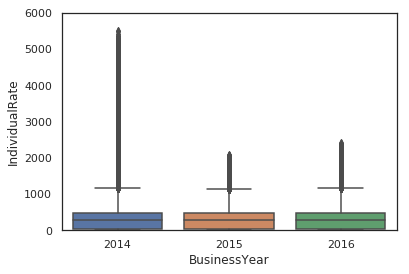

In [24]:
sns.boxplot(x="BusinessYear",y="IndividualRate", data=df)
plt.ylim(0,6000)

There are more outliers in 2014, so we need to analyse more

(0, 6000)

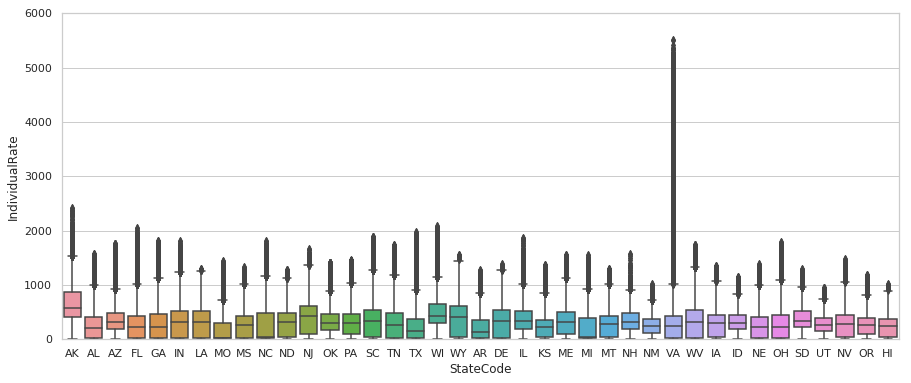

In [25]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=df)
plt.ylim(0,6000)

VA state has most outliers followed by AK

In [26]:
df2014 = df[df['BusinessYear'].isin([2014])].copy()
df2015 = df[df['BusinessYear'].isin([2015])].copy()
df2016 = df[df['BusinessYear'].isin([2016])].copy()

(0, 6000)

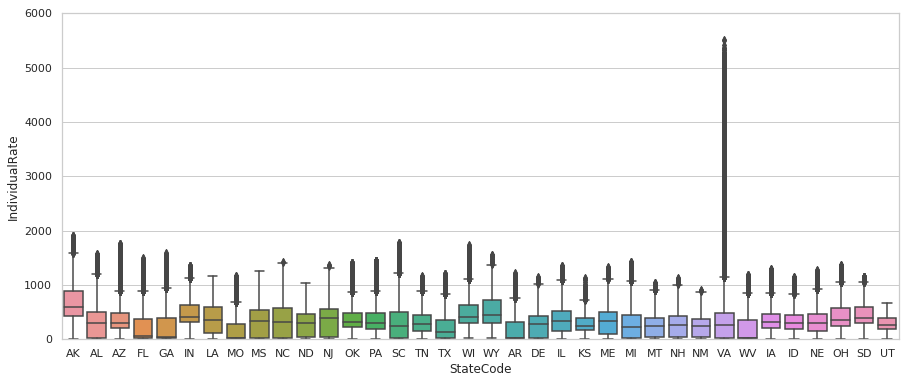

In [27]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=df2014)
plt.ylim(0,6000)

(0, 2500)

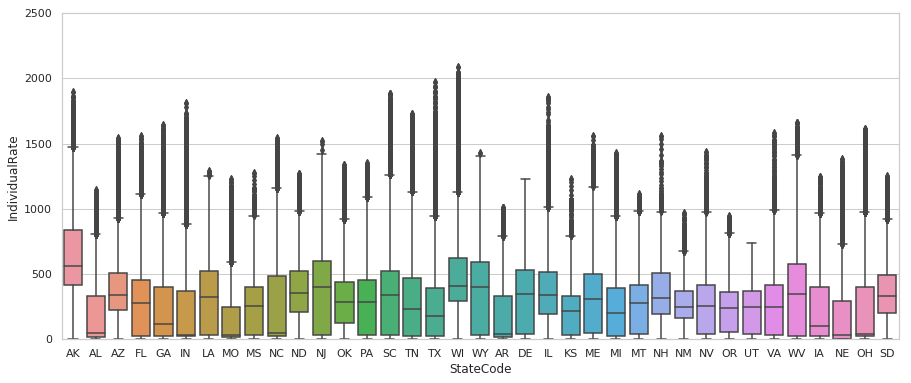

In [28]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=df2015)
plt.ylim(0,2500)

(0, 3000)

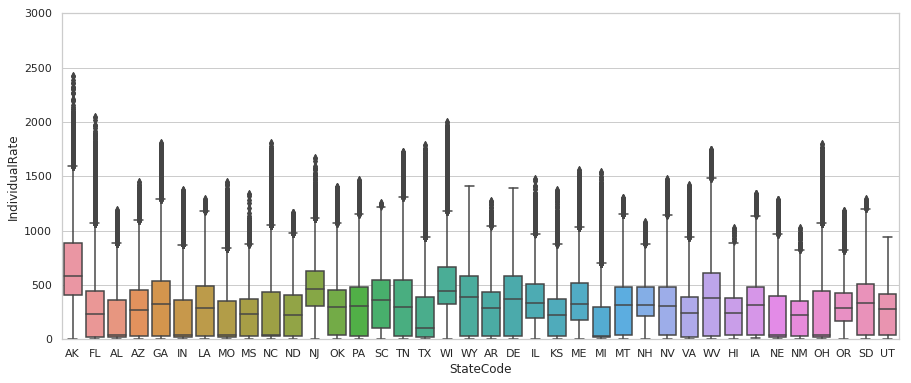

In [29]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=df2016)
plt.ylim(0,3000)

So most outliers are in 2014 for VA
We will try to create dataframe for VA and 2014 only

In [30]:
df2014_VA = df2014[df2014['StateCode'].isin(['VA'])].copy()

In [31]:
df2014_VA.shape

(122814, 21)

In [32]:
df2014_VA['Age'].replace(to_replace ="Family Option", value ="Fam" , inplace=True) 

In [33]:
df2014_VA['Age'].unique()

array(['0-20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65+', 'Fam'], dtype=object)

(0, 6000)

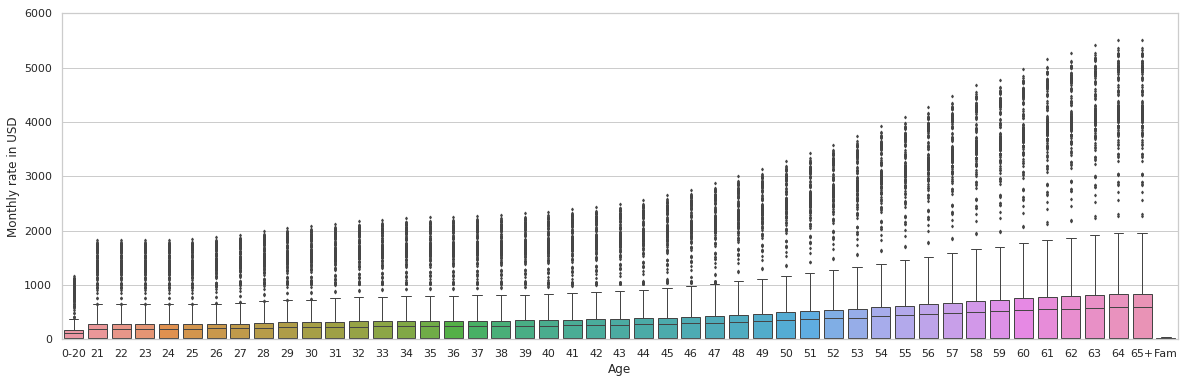

In [34]:
fig = plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")

ax = sns.boxplot(x="Age", y="IndividualRate", data=df2014_VA, linewidth=1.0, fliersize=2.0)
ax.set_ylabel("Monthly rate in USD")
plt.ylim(0,6000)



In [35]:
df2014_MO = df2014[df2014['StateCode'].isin(['MO'])].copy()

(0, 1500)

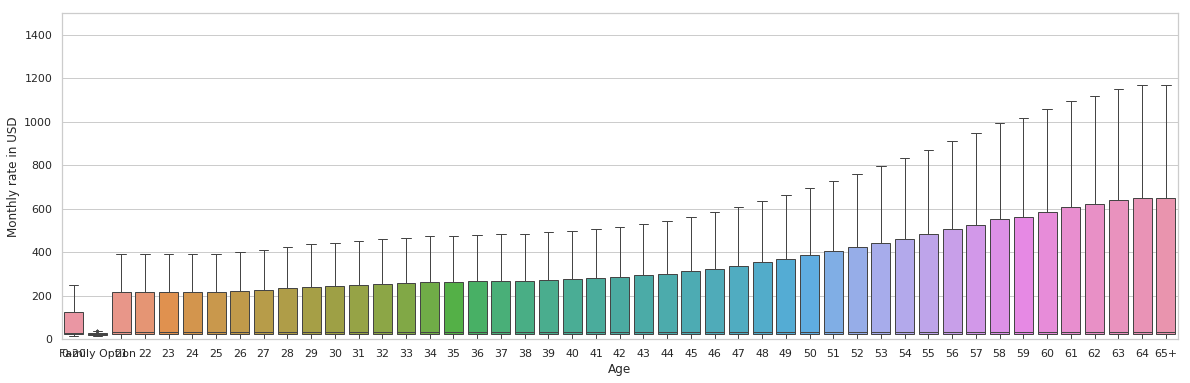

In [36]:
fig = plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")

ax = sns.boxplot(x="Age", y="IndividualRate", data=df2014_MO, linewidth=1.0, fliersize=2.0)
ax.set_ylabel("Monthly rate in USD")
plt.ylim(0,1500)

In [37]:

df.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,CoupleRate,Primary&Dependent,Primary&2Dependents,Primary&3OrMoreDependents,Couple&1Dependent,Couple&2Dependents,Couple&3OrMoreDependents
0,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,1,0,0-20,29.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0020001,1,0,Family Option,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56
2,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0020001,2,0,Family Option,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56
3,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,1,0,21,32.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2014,AK,21989,HIOS,2014-03-19,93-0438772,2014-01-01,2014-12-31,21989AK0010001,1,0,22,32.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [38]:
df1=df[['BusinessYear','RatingAreaId','Tobacco','Age','IndividualRate']].copy()
df1.head()

,BusinessYear,RatingAreaId,Tobacco,Age,IndividualRate
0,2014,1,0,0-20,29.00
1,2014,1,0,Family Option,36.95
2,2014,2,0,Family Option,36.95
3,2014,1,0,21,32.00
4,2014,1,0,22,32.00


In [54]:
df1['Age'].replace(to_replace ="0-20", value =20 , inplace=True) 
df1['Age'].replace(to_replace ="Family Option", value =101 , inplace=True) 
df1['Age'].replace(to_replace ="65+", value =65 , inplace=True) 

In [55]:
df1.head()

,BusinessYear,RatingAreaId,Tobacco,Age,IndividualRate
0,2014.0,1.0,0.0,20,29.00
1,2014.0,1.0,0.0,101,36.95
2,2014.0,2.0,0.0,101,36.95
3,2014.0,1.0,0.0,21,32.00
4,2014.0,1.0,0.0,22,32.00


In [45]:
df1.dtypes

BusinessYear        int64
RatingAreaId       object
Tobacco             int64
Age                object
IndividualRate    float64
dtype: object

In [46]:
df1["RatingAreaId"] = df1.RatingAreaId.astype(float)
df1.dtypes

BusinessYear        int64
RatingAreaId      float64
Tobacco             int64
Age                object
IndividualRate    float64
dtype: object

In [51]:

df1["Tobacco"] = df1.Tobacco.astype(float)
df1["BusinessYear"] = df1.BusinessYear.astype(float)
df1.dtypes

BusinessYear      float64
RatingAreaId      float64
Tobacco           float64
Age                object
IndividualRate    float64
dtype: object

In [56]:
df1['Age'].unique()

array([20, 101, '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
       '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
       '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62',
       '63', '64', 65], dtype=object)

In [57]:
df1["Age"] = df1.Age.astype(float)

In [58]:
df1.dtypes

BusinessYear      float64
RatingAreaId      float64
Tobacco           float64
Age               float64
IndividualRate    float64
dtype: object

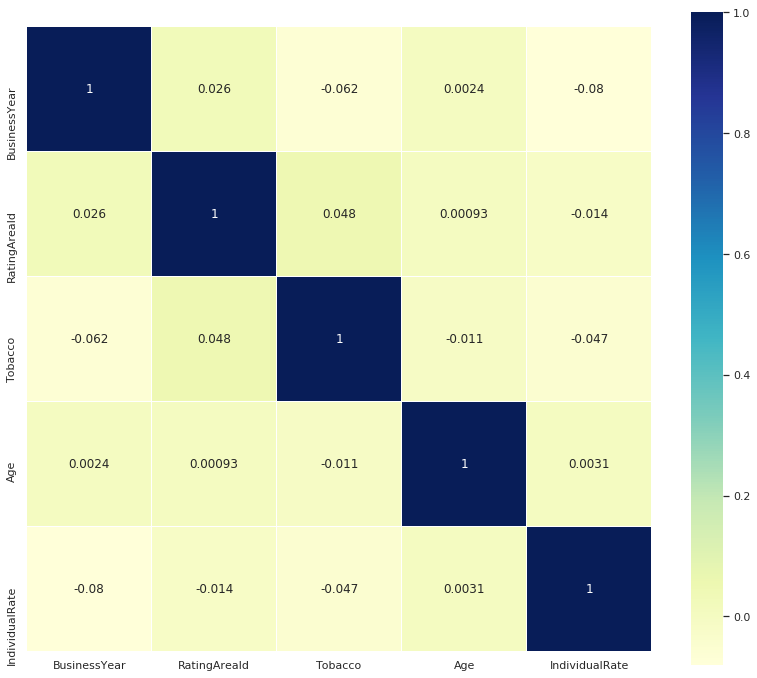

In [59]:
sns.set(color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(df1.astype(float).corr(), 
            linewidths=0.2, 
            square=True, 
            linecolor='white', 
            annot=True,
            cmap="YlGnBu")
plt.show()

In [ ]:
From heatmap we can infer that Individual Rates mostly depend on Age of the insured

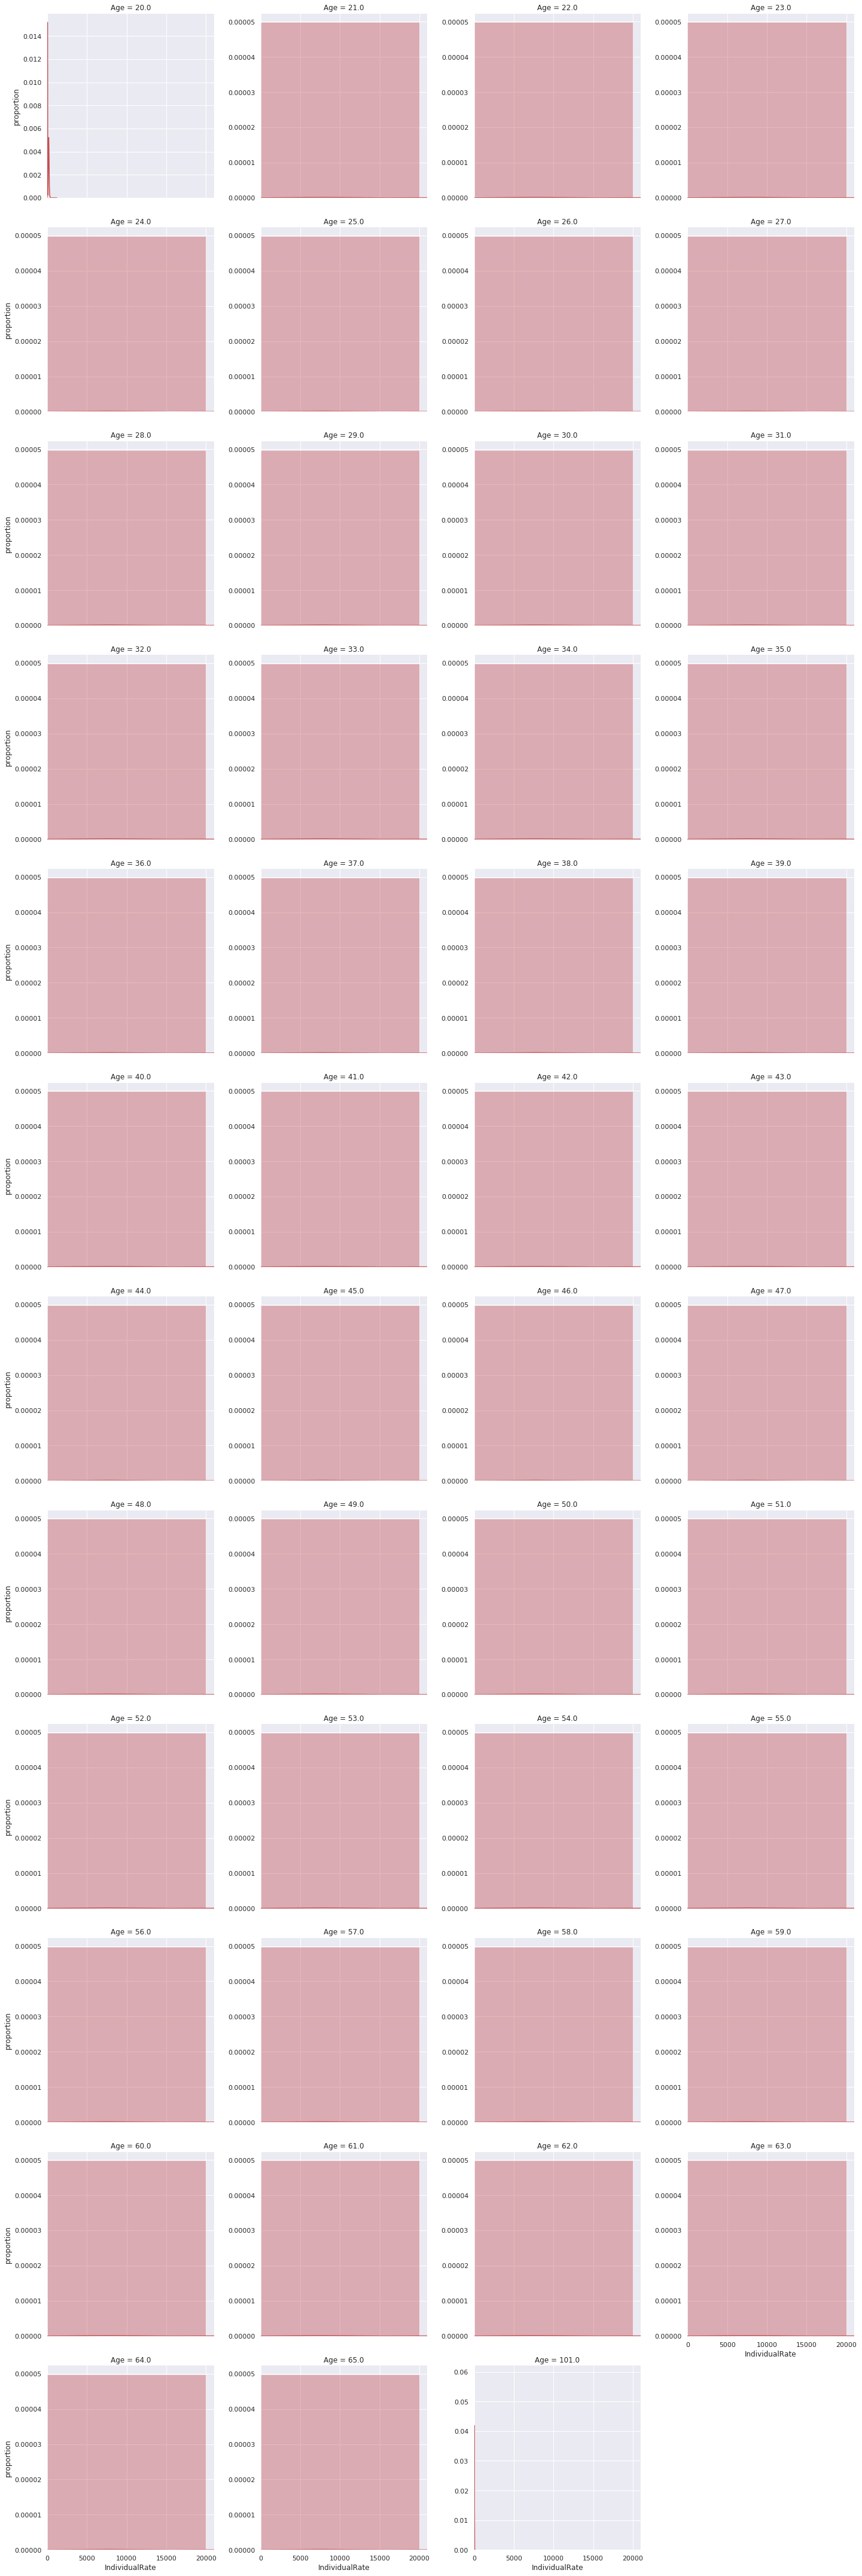

In [75]:
g = sns.FacetGrid(df1, col="Age",  height= 5, col_wrap=4 ,sharey=False, sharex = True)
(g.map(sns.distplot, "IndividualRate", color = 'r')).set(xlim=(0,300))
g.set_axis_labels("IndividualRate", "proportion");
g.despine(left=True)